# Exercice

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

### Data generation

In [2]:
# constants
g = 10.
V0 = 1.
H = 1.

In [3]:
# Model 
l = V0 * np.sqrt(2.*H/g)

### Données
pour file "V1msHvariable.csv"

In [4]:
#
error = 0.01
for h in [0.8, 0.9,1,1.1,1.2]:
    l = V0 * np.sqrt(2.*h/g)
    print('{0:.2f} {1:0.2f} {2:.2f}'.format(l,h,error))

0.40 0.80 0.01
0.42 0.90 0.01
0.45 1.00 0.01
0.47 1.10 0.01
0.49 1.20 0.01


### Données
pour file "H1mVvariable.csv"

In [5]:
error = 0.1
for v in [1, 1.2,1.5,2,3]:
    l = v * np.sqrt(2.*H/g)
    print('{0:.2f} {1:0.2f} {2:.2f}'.format(l,v,error))

0.45 1.00 0.10
0.54 1.20 0.10
0.67 1.50 0.10
0.89 2.00 0.10
1.34 3.00 0.10


## Solution

In [6]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="experience.png", width=500, height=500)

 Une bille supposée ponctuelle avec une vitesse horizontale $V_0$ tombe d'une table de hauteur $H$ et rencontre le sol à une longueur $L$.

Nous disposons de deux fichiers de mesures expérimentales (fichiers formatés csv séparés par des ";")
- "V1msHvariable.csv" expérience de mesure de la longueur $L$ à vitesse $V_0=1 \ m/s$ constante pour des différentes hauteurs $H$ avec l'erreur correspondante
- "H1mVvariable.csv" expérience de mesure de la longueur $L$ à hauteur $H= 1 \ m$ constante pour des différentes vitesses $V_0$ avec l'erreur correspondante

On propose un modèle pour la longueur $L$

$$ L = C V_0^\alpha H^\beta $$

nous allons évaluer les coefficients $\alpha$ et $\beta$, ainsi que la constante $C$.

### Point 1.1
En utilisant la bibliothèque Pandas, lisez le fichier "V1msHvariable.csv" et définisez les variables $L$, $H$, 
et  $erreur$ (de la mesure de hauteur)

In [7]:
d = pd.read_csv("V1msHvariable.csv",delimiter=";")
print(d)

      L    H  error
0  0.40  0.8   0.01
1  0.42  0.9   0.01
2  0.45  1.0   0.01
3  0.47  1.1   0.01
4  0.49  1.2   0.01


In [8]:
d.head()
# taking values from headers
L = d["L"]
H = d["H"]
e =  d["error"]

### Point 1.2
Faites une figure de $L$ vs $H$ avec barres d'erreur

In [9]:
import matplotlib.pyplot as plt

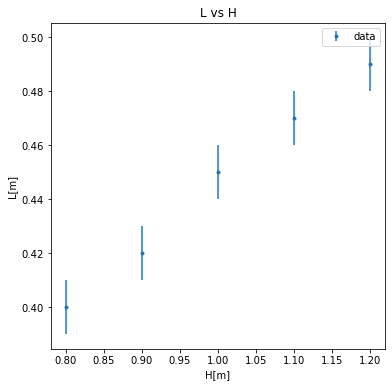

In [10]:
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.errorbar(H,L,e, marker='.', linestyle="none", label="data")
ax.set_title("L vs H")
ax.set_xlabel("H[m]")
ax.set_ylabel("L[m]")
ax.legend()

### Point 1.3
Utilisez la fonction "curve_fit" pour faire une regression linéaire des données exprimées en une échelle log-log
et trouve la valeur de $\alpha$

In [11]:
# fit
def func(x, a, b):
    return a * x + b

In [12]:
from scipy.optimize import curve_fit

In [13]:
popt= curve_fit(func, np.log(H), np.log(L))

In [14]:
popt[0]
a=popt[0][0]
b=popt[0][1]
print("a = %.3f" % a)
print("b= %.3f" % b)

a = 0.512
b= -0.805


### Point 1.4
Faites un figure log-log de $L$ vs $H$ en ajoutant la regression linéaire trouvée dans le point précédent

[]

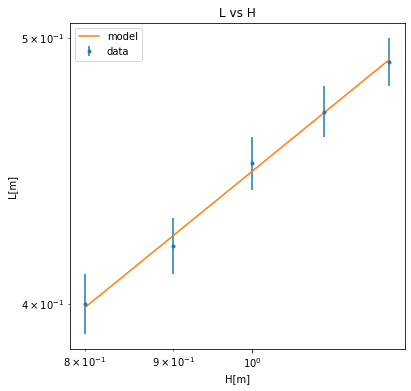

In [15]:
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.errorbar(H,L,e, marker='.', linestyle="none", label="data")
ax.plot(H,np.exp(b)*H**a,"-",label="model")
ax.set_title("with error bars")
ax.set_title("L vs H")
ax.set_xlabel("H[m]")
ax.set_ylabel("L[m]")
ax.legend()
ax.loglog()

Estimation de la constante $C$

In [16]:
C=L/H**0.5
print(C)

0    0.447214
1    0.442719
2    0.450000
3    0.448127
4    0.447307
dtype: float64


## Partie 2
Etude de la longueur $L$ à hauteur $H= 1 \ m$ constante pour des différentes vitesses $V_0$ 

### Point 2.1
En utilisant la bibliothèque Pandas, lisez le fichier "H1mVvariable.csv" et définisez les variables $L$, $V_0$, 
et $erreur$ (de la mesure de vitesse)

In [17]:
d = pd.read_csv("H1mVvariable.csv",delimiter=";")
print(d)

      L    V  error
0  0.45  1.0    0.1
1  0.54  1.2    0.1
2  0.67  1.5    0.1
3  0.89  2.0    0.1
4  1.34  3.0    0.1


In [18]:
# taking values from headers
L = d["L"]
V = d["V"]
e =  d["error"]

### Point 2.2
Faites une figure de $L$ vs $V_0$ avec barres d'erreur

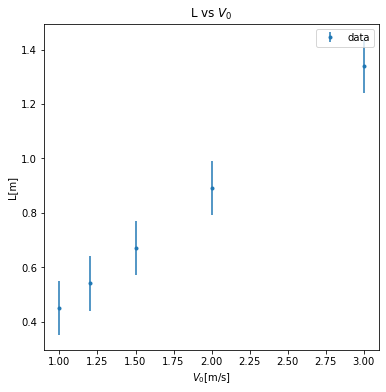

In [19]:
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.errorbar(V,L,e, marker='.', linestyle="none", label="data")
ax.set_title("with error bars")
ax.set_title("L vs $V_0$")
ax.set_xlabel("$V_0$[m/s]")
ax.set_ylabel("L[m]")
ax.legend()

### Point 2.3
Utilisez la fonction "curve_fit" pour faire une regression linéaire des données exprimées en une échelle log-log
et trouve la valeur de $\beta$

In [20]:
popt= curve_fit(func, np.log(V), np.log(L))

In [21]:
popt[0]
a=popt[0][0]
b=popt[0][1]
print("a = %.3f" % a)
print("b = %.3f" % b)

a = 0.991
b = -0.800


### Point 2.4
Faites un figure log-log de $L$ vs $V_0$ en ajoutant la regression linéaire trouvée dans le point précédent

[]

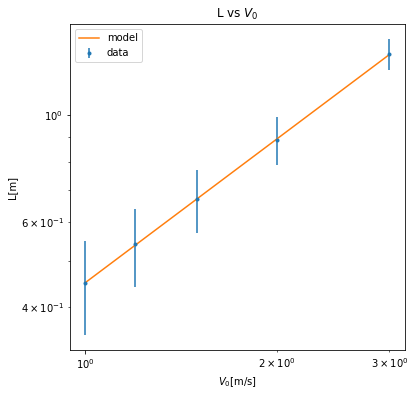

In [22]:
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.errorbar(V,L,e, marker='.', linestyle="none", label="data")
ax.plot(V,np.exp(b)*V**a,"-",label="model")
ax.set_title("with error bars")
ax.set_title("L vs $V_0$")
ax.set_xlabel("$V_0$[m/s]")
ax.set_ylabel("L[m]")
ax.legend()
ax.loglog()

Estimation de la constante $C$

In [23]:
C1=L/V
print(C1)

0    0.450000
1    0.450000
2    0.446667
3    0.445000
4    0.446667
dtype: float64


In [24]:
print(C.mean(),C1.mean())

0.447073328032969 0.44766666666666677


Le modèle peut s'écrire donc
$$L = C V H^{1/2}$$
avec $C=0.447$.
        L'unité de $C$ est $\sqrt{T^2/L}$
$$ L = [C] L/T L^{1/2}$$.

Comme le moteur de la chute c'est la gravité et $[g] = L/T^2$ nous pouvons écrire
$$ C = \sqrt{2/ g}$$ alors
$$ L = V_0 \sqrt{ \frac{2 H}{g}}$$.